## Perceptron using tensors

In [1]:
import torch as t

In [2]:
import pandas as pd
df = pd.read_csv('perceptron_toydata-truncated.txt', sep="\t")
df

,x1,x2,label
0,0.77,-1.14,0
1,-0.33,1.44,0
2,0.91,-3.07,0
3,-0.37,-1.91,0
4,-0.63,-1.53,0
5,0.39,-1.99,0
6,-0.49,-2.74,0
7,-0.68,-1.52,0
8,-0.10,-3.43,0
9,-0.05,-1.95,0


In [3]:
x_train = df[["x1", "x2"]].values
y_train = df["label"].values
x_train, y_train

(array([[ 0.77, -1.14],
        [-0.33,  1.44],
        [ 0.91, -3.07],
        [-0.37, -1.91],
        [-0.63, -1.53],
        [ 0.39, -1.99],
        [-0.49, -2.74],
        [-0.68, -1.52],
        [-0.1 , -3.43],
        [-0.05, -1.95],
        [ 3.88,  0.65],
        [ 0.73,  2.97],
        [ 0.83,  3.94],
        [ 1.59,  1.25],
        [ 1.14,  3.91],
        [ 1.73,  2.8 ],
        [ 1.31,  1.85],
        [ 1.56,  3.85],
        [ 1.23,  2.54],
        [ 1.33,  2.03]]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       dtype=int64))

In [4]:
X_train = t.from_numpy(x_train)
y_train = t.from_numpy(y_train)

In [5]:
X_train, y_train

(tensor([[ 0.7700, -1.1400],
         [-0.3300,  1.4400],
         [ 0.9100, -3.0700],
         [-0.3700, -1.9100],
         [-0.6300, -1.5300],
         [ 0.3900, -1.9900],
         [-0.4900, -2.7400],
         [-0.6800, -1.5200],
         [-0.1000, -3.4300],
         [-0.0500, -1.9500],
         [ 3.8800,  0.6500],
         [ 0.7300,  2.9700],
         [ 0.8300,  3.9400],
         [ 1.5900,  1.2500],
         [ 1.1400,  3.9100],
         [ 1.7300,  2.8000],
         [ 1.3100,  1.8500],
         [ 1.5600,  3.8500],
         [ 1.2300,  2.5400],
         [ 1.3300,  2.0300]], dtype=torch.float64),
 tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]))

In [6]:
X_train = X_train.to(t.float32)

In [7]:
X_train.shape

torch.Size([20, 2])

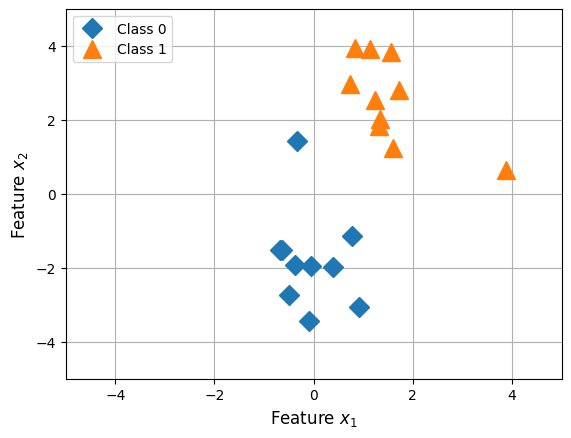

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(
    x_train[y_train == 0, 0],
    x_train[y_train == 0, 1],
    marker="D",
    markersize=10,
    linestyle="",
    label="Class 0",
)

plt.plot(
    x_train[y_train == 1, 0],
    x_train[y_train == 1, 1],
    marker="^",
    markersize=13,
    linestyle="",
    label="Class 1",
)

plt.legend(loc=2)

plt.xlim([-5, 5])
plt.ylim([-5, 5])

plt.xlabel("Feature $x_1$", fontsize=12)
plt.ylabel("Feature $x_2$", fontsize=12)

plt.grid()

In [17]:
def compute_accuracy(model, all_x, all_y):

    correct = 0.0
    for x, y in zip(all_x, all_y):
        prediction = model.forward(x)
        correct += int(prediction == y)
    acc = correct/len(all_y)
    return acc, str(acc*100) + "%"

def plot_boundry(model):
    w1, w2 = model.weights[0], model.weights[1]
    b = model.bias

    x1_min = -20
    x2_min = ((-w1 * x1_min) - b) / w2

    x1_max = 20
    x2_max = ((-w1 * x1_max) - b) / w2

    return x1_min, x1_max, x2_min, x2_max
    
def plot_decision(model, x_train, y_train):
    x1_min, x1_max, x2_min, x2_max = plot_boundry(p)


    plt.plot(
        x_train[y_train == 0, 0],
        x_train[y_train == 0, 1],
        marker="D",
        markersize=10,
        linestyle="",
        label="Class 0",
    )
    
    plt.plot(
        x_train[y_train == 1, 0],
        x_train[y_train == 1, 1],
        marker="^",
        markersize=13,
        linestyle="",
        label="Class 1",
    )
    
    plt.plot([x1_min, x1_max], [x2_min, x2_max], color="k")
    
    plt.legend(loc=2)
    
    plt.xlim([-5, 5])
    plt.ylim([-5, 5])
    
    plt.xlabel("Feature $x_1$", fontsize=12)
    plt.ylabel("Feature $x_2$", fontsize=12)
    
    plt.grid()
    plt.show()

In [20]:
class Perceptron:
    def __init__(self, num_features):
        self.num_features = num_features
        self.weights = t.zeros(num_features)
        self.bias = t.tensor(0.0)

    def forward(self, x):
        weighted_sum_z = t.dot(x, self.weights) + self.bias

        if weighted_sum_z > 0.0:
            prediction = t.tensor(1.)
        else:
            prediction = t.tensor(0.)
        return prediction

    def update(self, x, true_y):
        prediction = self.forward(x)
        error = true_y - prediction

        # update
        self.bias += error
        self.weights += error * x

        return error

def train(model, all_x, all_y, epochs):
    for epoch in range(epochs):
        error_count = 0
        for x, y in zip(all_x, all_y):
            error = model.update(x, y)
            error_count += abs(error)
            # print_values(model)
        
        
        print(f"Epoch {epoch+1} errors {error_count}")
        plot_decision(model, all_x, all_y)
        if error_count == 0:
            train_accuracy, percent_accuract = compute_accuracy(p, all_x, all_y)
            print("\n\n\n")
            print(f"Accuracy = {train_accuracy * 100}%")
            return

Epoch 1 errors 1.0


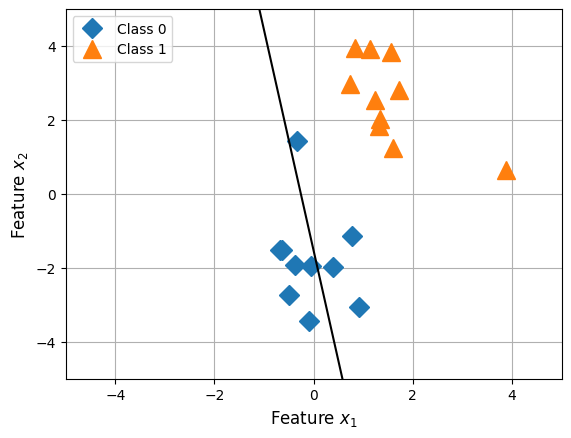

Epoch 2 errors 3.0


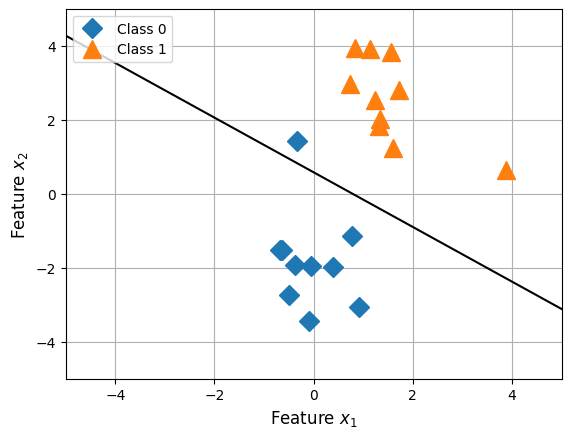

Epoch 3 errors 1.0


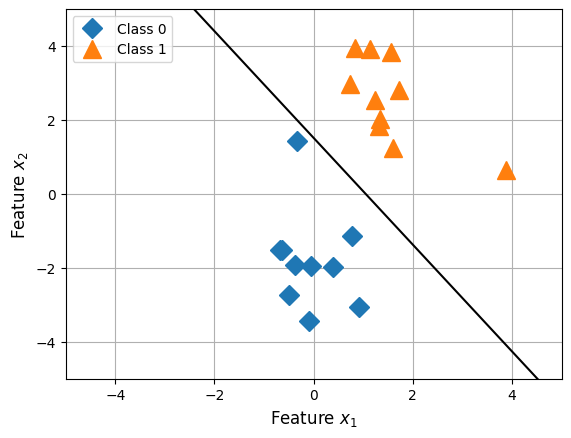

Epoch 4 errors 0.0


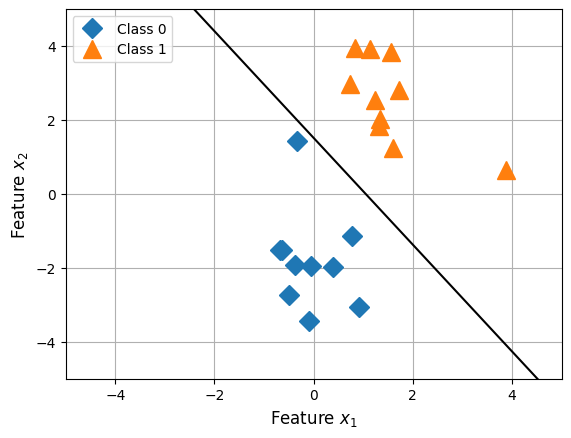





Accuracy = 100.0%


In [21]:
p = Perceptron(num_features=2)
train(model=p, all_x=X_train, all_y=y_train, epochs=20)

## Computation Graph

<img src="update parameters.png" alt="Alternative text" />